In [1]:
# import needed packages
import numpy as np
from model_code import utilities_visuals as ut
from model_code import utilities_simulation as us

from model_code import ArgModel as normal_am
from model_code import reducedArgModel as reduced_am

In [2]:
M = 4
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 100
    , "no_of_iterations": 16000
    # strength of biased processing
    ,"ß": 5
    # Number of implicitly modelled arguments
    ,"M": M
    # linkage matrix
    , "C": us.create_connection_matrix_symmetrical(no_of_arguments=M, normalised=True)
    , "initiation": "binomial"
    }


In [3]:
from model_code import fastModel
C = fastModel.create_connection_array_symmetrical(no_of_arguments=4, normalised=True)

In [4]:
results = fastModel.explicit_model(M=4, N=100, T=16000, ß=5, C=C)

0.0006187499999999999


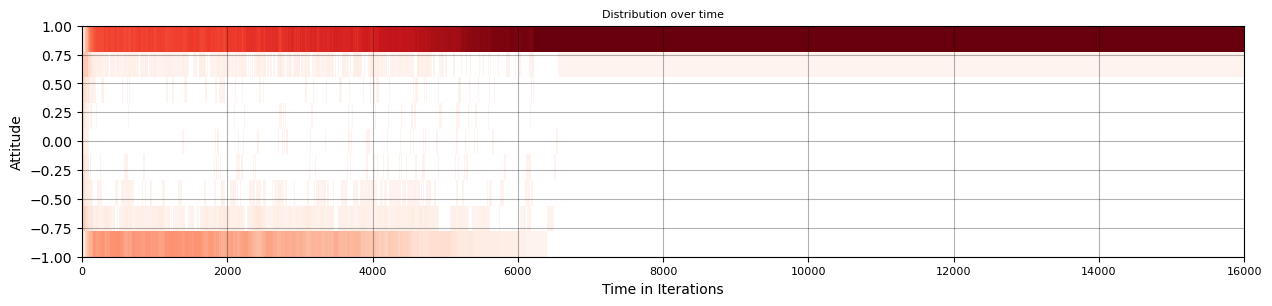

In [5]:
print(np.var(results[:,-1]))
fig = ut.two_d_histogramm_single_simulation(results, 9, C)

In [68]:
a = np.ones((2,8))
np.var(a, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
print(np.var(results[:,-1]))

In [63]:
results = fastModel.reduced_model(M=4, N=100, T=16000, ß=4, C=C)

In [64]:
print(np.var(results[:,1000]))
print(np.var(results[:,4000]))
print(np.var(results[:,-1]))

0.8538416945459609
0.8539546469752659
0.8564360261405287


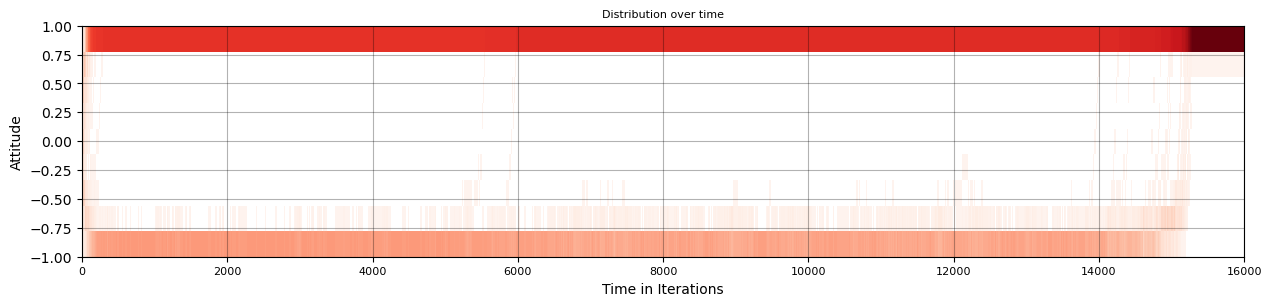

In [36]:
fig = ut.two_d_histogramm_single_simulation(results, 9, C)

In [3]:
ß_steps = 30
ß_info = (0, 6, ß_steps)
for ß_step in range(ß_steps):

    ß = np.round((ß_step/ß_steps) * (ß_info[1] - ß_info[0]),2)
    print(ß)

In [4]:
from model_code import fastModel
from numba_progress import ProgressBar 
import numpy as np

ß_steps = 30
ß_info = (0, 6, ß_steps)
M_values = 3
no_of_simulations = 50


with ProgressBar(total=ß_steps) as progress:
    red, exp = fastModel.SystematicParameterAnalysis(ß_info, M_values, no_of_simulations, progress)

In [4]:
red.shape

In [5]:
from model_code import utilities_visuals as us
import matplotlib.pyplot as plt

def consensrate_withrespect_M_against_beta(SyPaAn_data, Ms):

    fig = plt.figure(figsize=(13, 7))
    fontsize = 14
    plt.rc('xtick',labelsize=fontsize-1)
    plt.rc('ytick',labelsize=fontsize-1)

    number = len(Ms)+4
    cmap = plt.get_cmap('autumn')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    colors.reverse()

    for i, (color, edgecolor, M) in enumerate(zip(colors[2:-2], colors[4:], Ms)):
        SyPaAn_data_M = SyPaAn_data[:,i,:]
        consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        plt.plot(consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"Consens Rate for $M = {M}$ at $T = {int(M/4)*1000}$")

    plt.title(fr"Consens Rate at different M's with $T = M/4 * 1000$", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.xlabel(r"$\beta$", fontsize=fontsize)
    plt.ylabel("Consens Rate", fontsize=fontsize)

    #plt.savefig(f"consensrate_withrespect_M_against_beta{SyPaAn_data[0]['model_type']}.svg", format="svg")
    plt.show()


consensrate_withrespect_M_against_beta(red, [4,16,64])


In [6]:
consensrate_withrespect_M_against_beta(exp, [4,16,64])

In [10]:
measures = {
    "attitude_of_all_agents": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    #, "mean_attitude": np.zeros(model_parameters["no_of_iterations"])
    , "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
    #, "time_until_consens": model_parameters["no_of_iterations"]
}
# simulates a model run and saves the returned data for later use
measures_reduced = reduced_am.simulate_agent_interaction(model_parameters, measures)

In [5]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot(measures_reduced["variance_attitude"])

In [9]:
#creates the one look peek for a single simulation
fig = ut.two_d_histogramm_single_simulation(measures_reduced["attitude_of_all_agents"], 9, model_parameters["M"])

In [10]:
measures = {
    "attitude_of_all_agents": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    #, "mean_attitude": np.zeros(model_parameters["no_of_iterations"])
    #, "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
    #takes too long for 1000 agents
    #, "correlation_of_evaluations": np.zeros((model_parameters["no_of_agents"], model_parameters["no_of_agents"], model_parameters["no_of_iterations"]))
    }

measures_normal = normal_am.simulate_agent_interaction(model_parameters, measures)

In [26]:
f = plt.figure()
plt.plot(measures_normal["variance_attitude"])

In [27]:
print(measures_normal["variance_attitude"][3999])

In [28]:
#creates the one look peek for a single simulation
fig = ut.two_d_histogramm_single_simulation(measures_normal["attitude_of_all_agents"], 9, model_parameters["C"])